In [1]:
import os
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from mu2etools import *
from mu2etools import wideband

In [2]:
DATASET = 'rec.mu2e.CRV_wideband_cosmics.CRVWB-000-004-000.root'
runlist = [1312, 1315, 1327, 1341, 1354, 1370]
processor = wideband.DataProcessor(usexroot=True, fixtimes=False, runlist=runlist, userunlist=True, remove=False)
arr, arSpills = processor.getData(DATASET)

In [3]:
arr

<Array [{runNumber: 1312, ...}, ..., {...}] type='15 * {runNumber: int32, s...'>

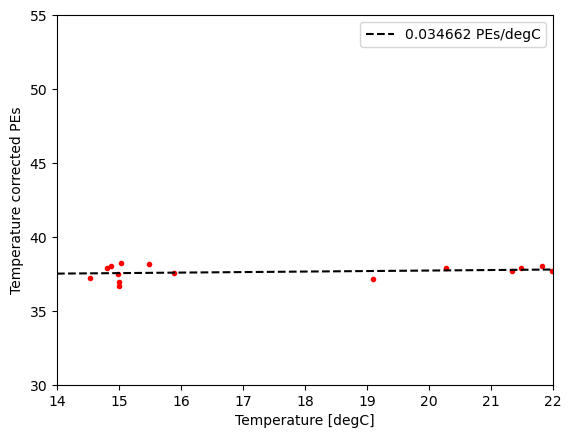

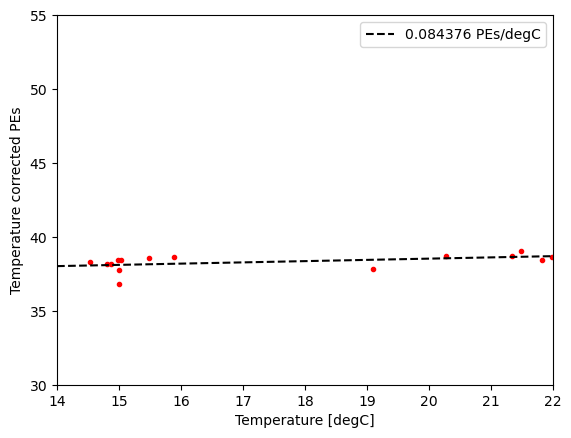

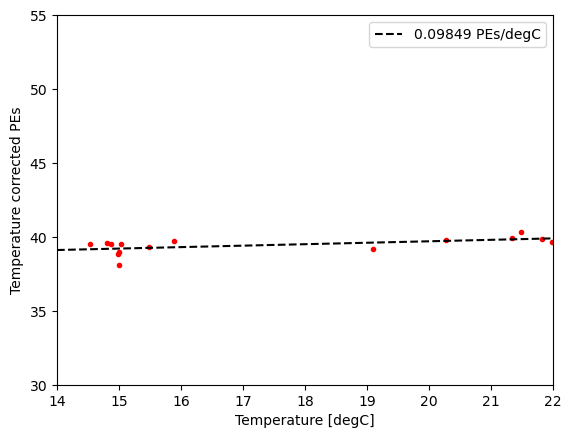

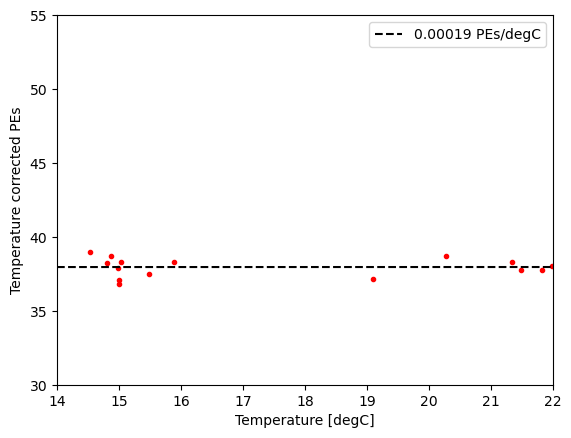

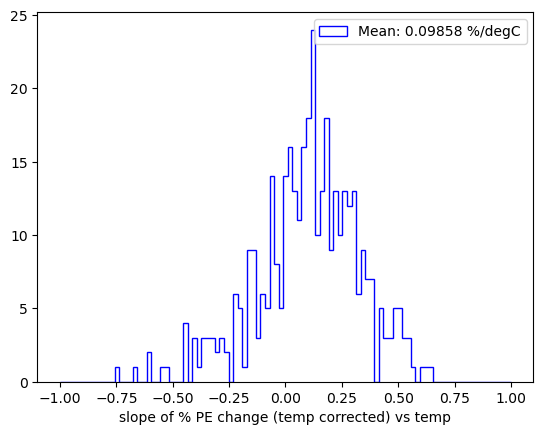

In [48]:
slopes = []
figcount = 0
for FEB in range(6):
    for chan in range(64):
        temp = arr['meanTemperatures'][:,FEB,chan]
        PEs = arr['PEsTemperatureCorrected'][:,FEB,chan]
        
        refPEs = arr['PEsTemperatureCorrected'][7,FEB,chan]
        percent = 100*(PEs - refPEs)/refPEs
        
        
        slope, intercept, r_value, p_value, std_err = stats.linregress(temp, percent)
        slopes.append(slope)
        
        slope, intercept, r_value, p_value, std_err = stats.linregress(temp, PEs)
        
        sloperound = round(slope, 6)
        
        temprange = np.linspace(14, 22)
        bestfit = slope*temprange + intercept
        
        if FEB < 1 and chan < 4:
            plt.figure(num=figcount)
            plt.plot(temp, PEs,'r.')
            plt.plot(temprange, bestfit, '--k', label='{0} PEs/degC'.format(sloperound))
            plt.legend()
            plt.xlim(14,22)
            plt.ylim(30,55)
            plt.xlabel('Temperature [degC]')
            plt.ylabel('Temperature corrected PEs')
            plt.show()
            figcount += 1
        
        
histbins = np.linspace(-1, 1, 100)

mean = round(np.mean(slopes), 6)

plt.figure(num=figcount)
hist0 = plt.hist(slopes, bins=histbins, histtype='step', color='b', label='Mean: {0} %/degC'.format(mean))
plt.legend()
plt.xlabel('slope of % PE change (temp corrected) vs temp')
plt.ylabel('')
plt.ylim(bottom=0)

plt.show()

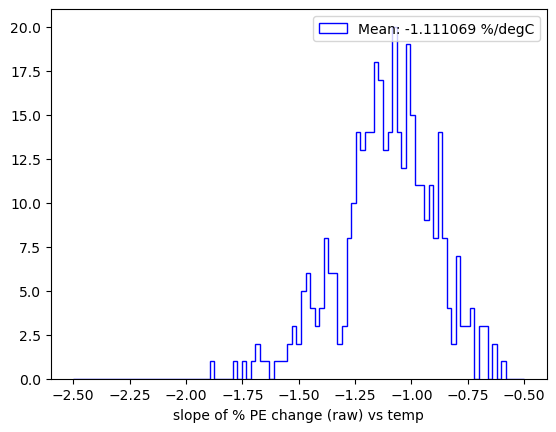

In [43]:
slopes = []
figcount = 0
for FEB in range(6):
    for chan in range(64):
        temp = arr['meanTemperatures'][:,FEB,chan]
        PEs = arr['PEs'][:,FEB,chan]
        
        refPEs = arr['PEs'][7,FEB,chan]
        percent = 100*(PEs - refPEs)/refPEs
        
        
        slope, intercept, r_value, p_value, std_err = stats.linregress(temp, percent)
        slopes.append(slope)
        
        #linfitparams = np.polyfit(temp, PEs, 1)
        #linfit_fnct = np.poly1d(linfit_params)
        """
        plt.figure(num=figcount)
        plt.plot(temp, PEs,'r.')#, temp, linfit_fnct(temp), '--k')
        plt.xlim(14,22)
        plt.ylim(30,55)
        plt.xlabel('Temperature [degC]')
        plt.ylabel('PEs')
        plt.show()
        figcount += 1
        """
        
histbins = np.linspace(-2.5, -0.5, 100)

mean = round(np.mean(slopes), 6)

plt.figure(num=figcount)
hist0 = plt.hist(slopes, bins=histbins, histtype='step', color='b', label='Mean: {0} %/degC'.format(mean))
plt.legend()
plt.xlabel('slope of % PE change (raw) vs temp')
plt.ylabel('')
plt.ylim(bottom=0)

plt.show()

In [49]:
arSPE = ak.mask(arr['calibConstants'], arr['calibConstants']>0).to_numpy()

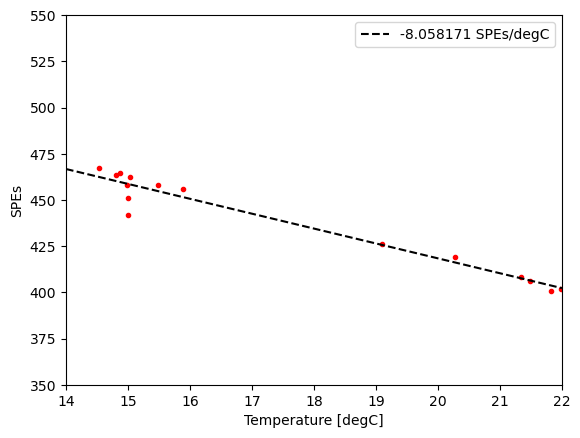

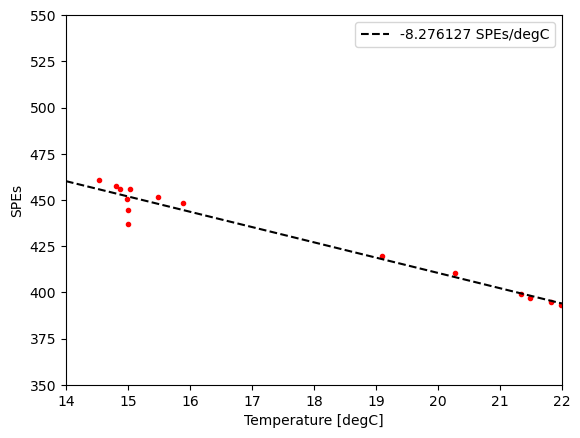

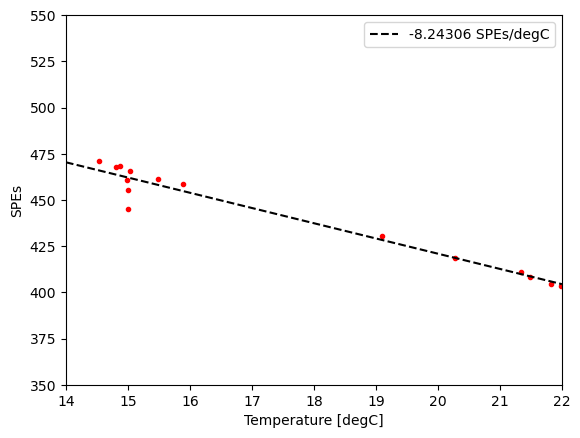

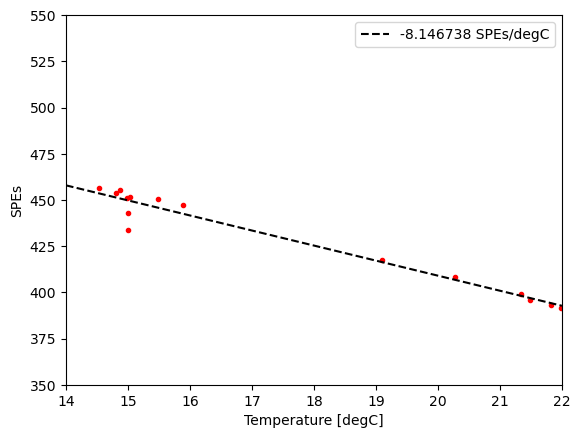

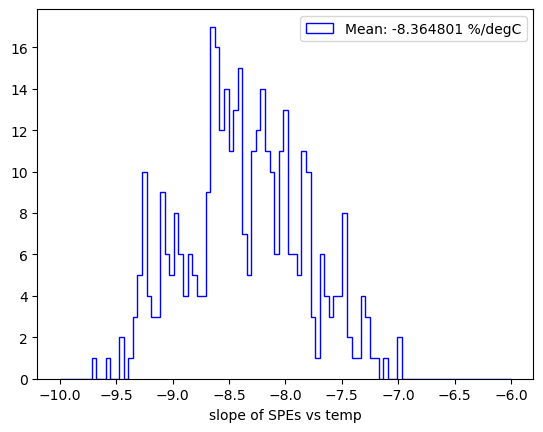

In [58]:
slopes = []
figcount = 0
for FEB in range(6):
    for chan in range(64):
        temp = arr['meanTemperatures'][:,FEB,chan]
        SPEs = arSPE[:,FEB,chan]
        
        
        slope, intercept, r_value, p_value, std_err = stats.linregress(temp, SPEs)
        slopes.append(slope)
        
        sloperound = round(slope, 6)
        
        temprange = np.linspace(14, 22)
        bestfit = slope*temprange + intercept
        
        if FEB < 1 and chan < 4:
            plt.figure(num=figcount)
            plt.plot(temp, SPEs,'r.')
            plt.plot(temprange, bestfit, '--k', label='{0} SPEs/degC'.format(sloperound))
            plt.legend()
            plt.xlim(14,22)
            plt.ylim(350,550)
            plt.xlabel('Temperature [degC]')
            plt.ylabel('SPEs')
            plt.show()
            figcount += 1
        
        
histbins = np.linspace(-10, -6, 100)

mean = round(np.mean(slopes), 6)

plt.figure(num=figcount)
hist0 = plt.hist(slopes, bins=histbins, histtype='step', color='b', label='Mean: {0} %/degC'.format(mean))
plt.legend()
plt.xlabel('slope of SPEs vs temp')
plt.ylabel('')
plt.ylim(bottom=0)

plt.show()